In [140]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import math
import random
import matplotlib.ticker as plticker

import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_excel("NASA_Labs_Facilities.xlsx")

### 1. Open your dataset up using pandas in a Jupyter notebook

In [3]:
df


,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
0,DOD,Air Force Research Laboratory,Public,"Mach 6, High Reynolds Number Facility",1960.0,Under Rehabilitation,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
1,DOD,Air Force Research Laboratory,Public,Subsonic Aerodynamic Research Laboratory,1985.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
2,DOD,Air Force Research Laboratory,Public,Trisonic Gasdynamics Facility,1960.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
3,DOD,Air Force Research Laboratory,Public,Vertical Wind Tunnel,1960.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
4,DOD,Arnold Engineering Development Center,Public,10V Test Chamber,1965.0,Active,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2013-08-23 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
5,DOD,Arnold Engineering Development Center,Public,7V Sensor Test Facility,1994.0,Active,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2012-09-19 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
6,DOD,Arnold Engineering Development Center,Public,Mark I Aerospace Chamber,1963.0,Inactive,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2012-09-19 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
7,DOE,Pacific Northwest National Laboratory,Public,Atmospheric Measurements Laboratory,NaN,Active,http://www.pnnl.gov/atmospheric/programs/atmos...,2013-09-23,2013-09-23 00:00:00,Battelle Boulevard,Richland,WA,99352,US,Mardell Sours,LSB MSN J2-33,509-372-6026
8,DOE,Pacific Northwest National Laboratory,Public,Atmospheric Radiation Measurement Climate Rese...,NaN,Active,http://www.pnnl.gov/atmospheric/programs/arm.stm,2013-09-23,2013-09-23 00:00:00,Battelle Boulevard,Richland,WA,99352,US,Mardell Sours,LSB MSN J2-33,509-372-6026
9,DOE,Pacific Northwest National Laboratory,Public,Atmospheric Research Measurement Aerial Facility,NaN,Active,http://www.pnnl.gov/atmospheric/programs/arm_a...,2013-09-23,2013-09-23 00:00:00,Battelle Boulevard,Richland,WA,99352,US,Mardell Sours,LSB MSN J2-33,509-372-6026


### 3. Do a .columns to get a feel for your data

In [4]:
df.columns

Index(['Agency', 'Center', 'Center Search Status', 'Facility', 'Occupied',
       'Status', 'URL Link', 'Record Date', 'Last Update', 'Address', 'City',
       'State', 'ZIP', 'Country', 'Contact', 'Mail Stop', 'Phone'],
      dtype='object')

### 4. Write down 12 questions to ask your data, or 12 things to hunt for in the data

1. Find all the agencies that house a NASA Lab facility.
2. Count the number of each agencies that house a Nasa Lab facility.
3. Find the different centers that run a NASA lab, and their count.
4. List the status of the lab facilities and their count?
5. Find how many active labs are operating today.
6. Which of the US states has the highest number of NASA Lab facilities ?
7. Of all the states that has a NASA lab, which state has the lowest number in the country ?
8. Group them by agencies.
9. Group them by centers, and discover how many active labs are operating under each of them.
10. Find all the cities with a Lab facility. Group them and find how many active labs are operating in each city.
11. Group the states and find how many active labs are operating in each city.
12. Find all the point of contacts. Find how many lab facilities each one handles.
13. Find the current status of lab facilities under each point of contacts.
14. Find the year in which they have made the last update.
15. Find the number of centers that begin between 1960 - 1969, 1970 - 1979, 1980 - 1989, 1990 - 1999, and 2000 and beyond




#### 1.Find all the agencies that house a NASA Lab facility.

In [71]:
count = df['Agency'].value_counts()

count

NASA 2      397
Intelsat     17
DOE          12
DOD           7
RAYTHEON      5
OSC           1
Name: Agency, dtype: int64

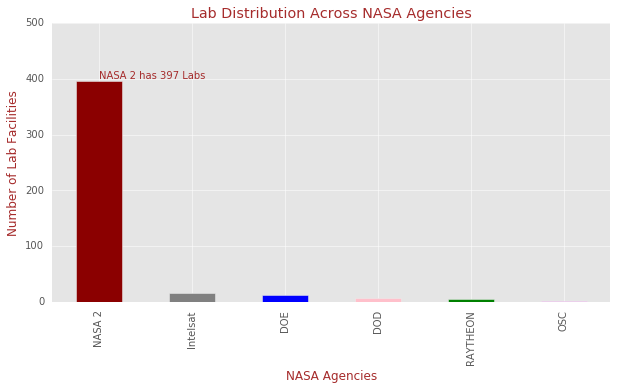

In [103]:
fig, ax =  plt.subplots(figsize=(10,5))
df['Agency'].value_counts().plot(kind='bar',ax=ax, color=['darkred', 'gray','blue','pink','green', 'violet'], x='Agency')

ax.set_ylim([0, 500])


# send the grid behind
ax.set_axisbelow(True)
# get rid of that border that is around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is on
    labelbottom ='on'# bottom label is on
)
plt.tick_params(
    which='minor', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is off
    labelbottom ='off'# bottom label is on
)

ax.set_title("Lab Distribution Across NASA Agencies", color='brown')
ax.set_ylabel("Number of Lab Facilities", color='brown')
ax.set_xlabel("NASA Agencies", color='brown')
#use to annotate to add text
ax.annotate(s="NASA 2 has 397 Labs", xy=(0,400),color='brown')

plt.savefig('nasa-agencies.pdf', transparent=True)

In [7]:
print("NASA runs a total of 397 lab facilities, Nasa Intelsat runs 17, Department of Defence(DOD) runs 7 labs, Department of Energy runs 12 labs, Raytheon runs 5, and Orbital Sciences Corporation (osc) runs only one NASA lab facility")

NASA runs a total of 397 lab facilities, Nasa Intelsat runs 17, Department of Defence(DOD) runs 7 labs, Department of Energy runs 12 labs, Raytheon runs 5, and Orbital Sciences Corporation (osc) runs only one NASA lab facility


#### 2. Find the different centers that run a NASA lab, and their count.

In [66]:
centers = pd.DataFrame(df['Center'].value_counts())
centers

,Center
Marshall Space Flight Center,136
Langley Research Center,50
Jet Propulsion Lab,39
Goddard Space Flight Center,32
Glenn Research Center,31
Stennis Space Center,27
NASA Aircraft Management Division,23
Michoud Assembly Facility,17
Intelsat General,17
Ames Research Center,15


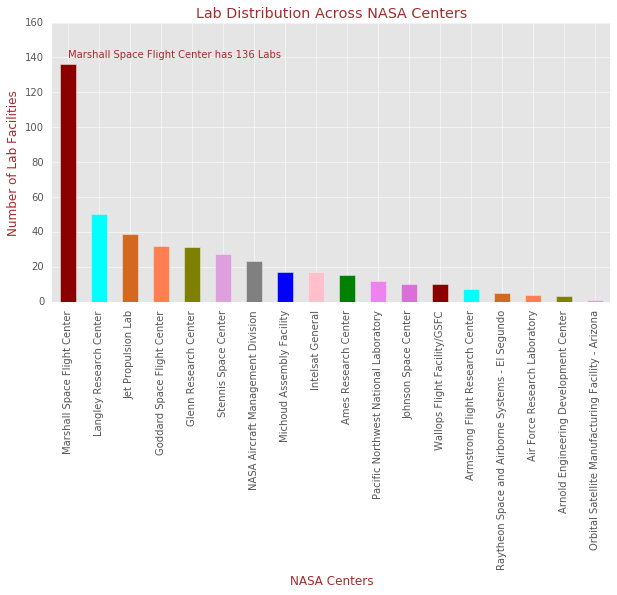

In [114]:
fig, ax =  plt.subplots(figsize=(10,5))
df['Center'].value_counts().plot(kind='bar',ax=ax, color=['darkred','aqua', 'chocolate','coral','olive','plum' , 'gray','blue','pink','green', 'violet', 'orchid'], x='Agency')

ax.set_ylim([0, 160])


# send the grid behind
ax.set_axisbelow(True)
# get rid of that border that is around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is on
    labelbottom ='on'# bottom label is on
)
plt.tick_params(
    which='minor', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is off
    labelbottom ='off'# bottom label is on
)

ax.set_title("Lab Distribution Across NASA Centers", color='brown')
ax.set_ylabel("Number of Lab Facilities", color='brown')
ax.set_xlabel("NASA Centers", color='brown')
#use to annotate to add text
ax.annotate(s="Marshall Space Flight Center has 136 Labs", xy=(0,140),color='brown')

plt.savefig('nasa-centers.pdf', transparent=True)

#### 3. List the status of the lab facilities and their count?

In [9]:
df['Status'].value_counts()

Active                  388
Inactive                 22
Under Rehabilitation      2
Under                     1
Under Construction        1
Name: Status, dtype: int64

#### 4. Find how many active labs are operating today.

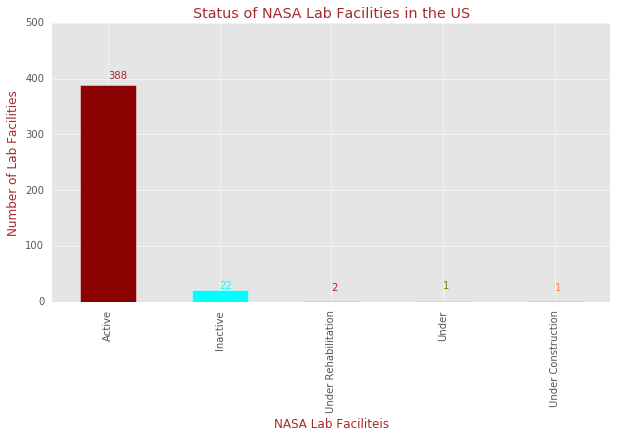

In [142]:
fig, ax =  plt.subplots(figsize=(10,5))
df['Status'].value_counts().plot(kind='bar',ax=ax, color=['darkred','aqua', 'chocolate','coral','olive','plum' , 'gray','blue','pink','green', 'violet', 'orchid'], x='Agency')

ax.set_ylim([0, 500])


# send the grid behind
ax.set_axisbelow(True)
# get rid of that border that is around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is on
    labelbottom ='on'# bottom label is on
)
plt.tick_params(
    which='minor', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is off
    labelbottom ='off'# bottom label is on
)

ax.set_title("Status of NASA Lab Facilities in the US", color='brown')
ax.set_ylabel("Number of Lab Facilities", color='brown')
ax.set_xlabel("NASA Lab Faciliteis", color='brown')
#use to annotate to add text
ax.annotate(s="388", xy=(0,400),color='brown')
ax.annotate(s="22", xy=(1,23),color='aqua')
ax.annotate(s="2", xy=(2,20),color='brown')
ax.annotate(s="1", xy=(3,23),color='olive')
ax.annotate(s="1", xy=(4,20),color='coral')
plt.savefig('active-centers.pdf', transparent=True)

In [10]:
print("There are 388 active lab facilities in the US")

There are 388 active lab facilities in the US


#### 5. Which of the US states has the highest number of NASA Lab facilities ?

In [11]:
df['State'].value_counts()

AL       136
CA        83
VA        60
OH        35
MD        32
MS        27
DC        21
LA        17
WA        12
TX        10
TN         3
20546      2
AZ         1
Name: State, dtype: int64

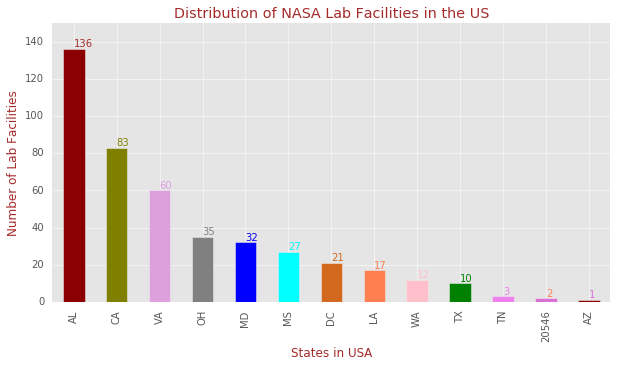

In [150]:
fig, ax =  plt.subplots(figsize=(10,5))
df['State'].value_counts().plot(kind='bar',ax=ax, color=['darkred','olive','plum' , 'gray','blue','aqua', 'chocolate','coral','pink','green', 'violet', 'orchid'], x='Agency')

ax.set_ylim([0, 150])


# send the grid behind
ax.set_axisbelow(True)
# get rid of that border that is around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is on
    labelbottom ='on'# bottom label is on
)
plt.tick_params(
    which='minor', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is off
    labelbottom ='off'# bottom label is on
)

ax.set_title("Distribution of NASA Lab Facilities in the US", color='brown')
ax.set_ylabel("Number of Lab Facilities", color='brown')
ax.set_xlabel("States in USA", color='brown')
#use to annotate to add text
ax.annotate(s="136", xy=(0,137),color='brown')
ax.annotate(s="83", xy=(1,84),color='olive')
ax.annotate(s="60", xy=(2,61),color='plum')
ax.annotate(s="35", xy=(3,36),color='gray')
ax.annotate(s="32", xy=(4,33),color='blue')
ax.annotate(s="27", xy=(5,28),color='aqua')
ax.annotate(s="21", xy=(6,22),color='chocolate')
ax.annotate(s="17", xy=(7,18),color='coral')
ax.annotate(s="12", xy=(8,13),color='pink')
ax.annotate(s="10", xy=(9,11),color='green')
ax.annotate(s="3", xy=(10,4),color='violet')
ax.annotate(s="2", xy=(11,3),color='coral')
ax.annotate(s="1", xy=(12,2),color='orchid')
plt.savefig('states-centers.pdf', transparent=True)

In [12]:
print("Alabama has the highest number of NASA Lab facilities in the country.")

Alabama has the highest number of NASA Lab facilities in the country.


#### 6. Which of the US states has the lowest number of NASA Lab facilities ?

In [13]:
print("Alabama has the highest number of NASA Lab facilities in the country")

Alabama has the highest number of NASA Lab facilities in the country


#### 7. Group them by agencies, and count the centers operating under each agency.

In [14]:
df.groupby("Agency")['Center'].value_counts()

Agency    Center                                            
DOD       Air Force Research Laboratory                           4
          Arnold Engineering Development Center                   3
DOE       Pacific Northwest National Laboratory                  12
Intelsat  Intelsat General                                       17
NASA 2    Marshall Space Flight Center                          136
          Langley Research Center                                50
          Jet Propulsion Lab                                     39
          Goddard Space Flight Center                            32
          Glenn Research Center                                  31
          Stennis Space Center                                   27
          NASA Aircraft Management Division                      23
          Michoud Assembly Facility                              17
          Ames Research Center                                   15
          Johnson Space Center                         

In [163]:
test = pd.DataFrame(df.groupby("Agency")['Center'].value_counts())
test.head()

Center
Agency   Center                                       
DOD      Air Force Research Laboratory               4
         Arnold Engineering Development Center       3
DOE      Pacific Northwest National Laboratory      12
Intelsat Intelsat General                           17
NASA 2   Marshall Space Flight Center              136

In [176]:
#test.columns = test.columns.droplevel(-1)
#print(test)

In [175]:
path='C:\\Users\\Radhika\\Desktop\\'
test.to_csv(path+'testfile.csv')


In [177]:
test = pd.read_csv("testfile.csv")
test.head()

,Agency,Center,Count
0,DOD,Air Force Research Laboratory,4
1,DOD,Arnold Engineering Development Center,3
2,DOE,Pacific Northwest National Laboratory,12
3,Intelsat,Intelsat General,17
4,NASA 2,Marshall Space Flight Center,136


In [196]:
dod= test[test['Agency']=='DOD']
doe= test[test['Agency']=='DOE']
intelsat= test[test['Agency']=='Intelsat']
nasa2= test[test['Agency']=='NASA 2']
ose= test[test['Agency']=='OSE']
ray= test[test['Agency']=='RAYTHEON']

In [169]:
#test.to_dict()

TypeError: Empty 'DataFrame': no numeric data to plot

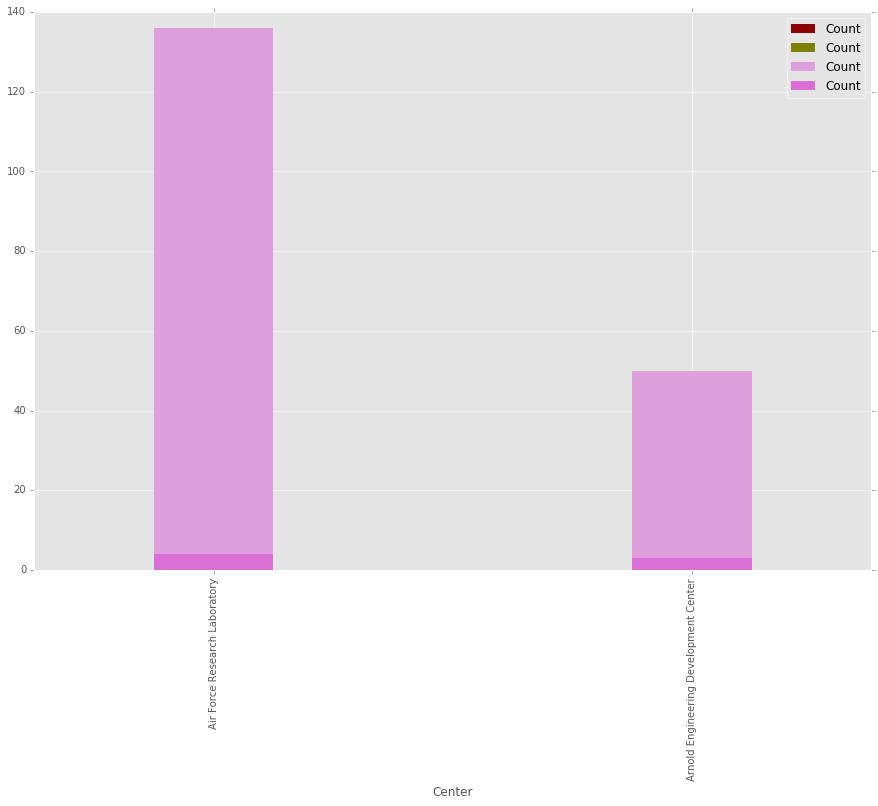

In [210]:
fig, ax =  plt.subplots(figsize=(15,10))
doe.plot(kind='bar',x='Center', y='Count',ax=ax, color='darkred', linewidth=0, width=0.25)
intelsat.plot(kind='bar',x='Center', y='Count',ax=ax, color='olive', linewidth=0, width=0.25)
nasa2.plot(kind='bar',x='Center', y='Count',ax=ax, color='plum', linewidth=0, width=0.25)
dod.plot(kind='bar',x='Center', y='Count',ax=ax, color='orchid', linewidth=0, width=0.25)
ose.plot(kind='bar',x='Center', y='Count',ax=ax, color= 'chocolate', linewidth=0, width=0.25)
ray.plot(kind='bar',x='Center', y='Count',ax=ax, color='coral', linewidth=0, width=0.25)

ax.set_ylim([0, 400])


#### 8. Group them by centers, and discover how many active labs are operating under each of them.

In [15]:
df.groupby("Agency")['Status'].value_counts()

Agency    Status              
DOD       Active                    5
          Inactive                  1
          Under Rehabilitation      1
DOE       Active                   12
Intelsat  Active                    1
NASA 2    Active                  364
          Inactive                 21
          Under                     1
          Under Construction        1
          Under Rehabilitation      1
OSC       Active                    1
RAYTHEON  Active                    5
Name: Status, dtype: int64

#### 9. Find all the cities with a Lab facility. Group them and find how many active labs are operating in each city.

In [16]:
df['City'].value_counts()

MSFC                    136
Hampton                  50
PASADENA                 39
Greenbelt                32
Cleveland                31
Stennis Space Center     27
Washington               21
Rancho Palos Verdes      17
New Orleans              17
Moffett Field            15
Richland                 12
Houston                  10
Wallops Island           10
Edwards                   7
El Segundo                5
Wright-Patterson AFB      4
Arnold AFB                3
DC                        2
Gibert                    1
Name: City, dtype: int64

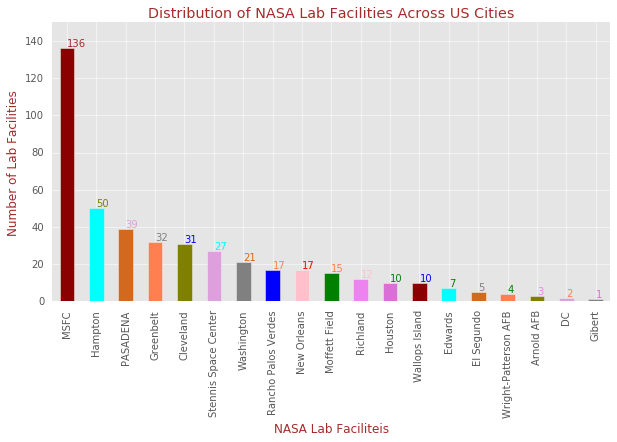

In [215]:
fig, ax =  plt.subplots(figsize=(10,5))
df['City'].value_counts().plot(kind='bar',ax=ax, color=['darkred','aqua', 'chocolate','coral','olive','plum' , 'gray','blue','pink','green', 'violet', 'orchid'], x='Agency')

ax.set_ylim([0, 150])


# send the grid behind
ax.set_axisbelow(True)
# get rid of that border that is around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is on
    labelbottom ='on'# bottom label is on
)
plt.tick_params(
    which='minor', # both major and minor ticks are affected
    top ='off', #ticks along the top edge are off
    left = 'off',#ticks along the left edge are off
    right = 'off',
    bottom = 'off',
    labeltop='off', #top label is off
    labelbottom ='off'# bottom label is on
)

ax.set_title("Distribution of NASA Lab Facilities Across US Cities", color='brown')
ax.set_ylabel("Number of Lab Facilities", color='brown')
ax.set_xlabel("NASA Lab Faciliteis", color='brown')
#use to annotate to add text
ax.annotate(s="136", xy=(0,137),color='brown')
ax.annotate(s="50", xy=(1,51),color='olive')
ax.annotate(s="39", xy=(2,40),color='plum')
ax.annotate(s="32", xy=(3,33),color='gray')
ax.annotate(s="31", xy=(4,32),color='blue')
ax.annotate(s="27", xy=(5,28),color='aqua')
ax.annotate(s="21", xy=(6,22),color='chocolate')
ax.annotate(s="17", xy=(7,18),color='coral')
ax.annotate(s="17", xy=(8,18),color='red')
ax.annotate(s="15", xy=(9,16),color='coral')
ax.annotate(s="12", xy=(10,13),color='pink')
ax.annotate(s="10", xy=(11,11),color='green')
ax.annotate(s="10", xy=(12,11),color='blue')
ax.annotate(s="7", xy=(13,8),color='green')
ax.annotate(s="5", xy=(14,6),color='gray')
ax.annotate(s="4", xy=(15,5),color='green')
ax.annotate(s="3", xy=(16,4),color='violet')
ax.annotate(s="2", xy=(17,3),color='coral')
ax.annotate(s="1", xy=(18,2),color='orchid')
plt.savefig('active-city.pdf', transparent=True)

#### 10. Find all the cities with a Lab facility. Group them and find how many active labs are operating in each city.

In [17]:
df.groupby("City")['Status'].value_counts()

City                  Status              
Arnold AFB            Active                    2
                      Inactive                  1
Cleveland             Active                   30
                      Under Construction        1
DC                    Active                    2
Edwards               Active                    7
El Segundo            Active                    5
Gibert                Active                    1
Greenbelt             Active                   32
Hampton               Active                   48
                      Inactive                  2
Houston               Active                    9
                      Under Rehabilitation      1
MSFC                  Active                  118
                      Inactive                  8
                      Under                     1
Moffett Field         Active                   14
                      Inactive                  1
New Orleans           Active                   16
       

#### 11. Group the states and find how many active labs are operating in each city

In [18]:
state= df.groupby("State")['Status'].value_counts()
state

State  Status              
20546  Active                    2
AL     Active                  118
       Inactive                  8
       Under                     1
AZ     Active                    1
CA     Active                   61
       Inactive                  6
DC     Active                   19
       Inactive                  2
LA     Active                   16
       Inactive                  1
MD     Active                   32
MS     Active                   25
       Inactive                  2
OH     Active                   33
       Under Construction        1
       Under Rehabilitation      1
TN     Active                    2
       Inactive                  1
TX     Active                    9
       Under Rehabilitation      1
VA     Active                   58
       Inactive                  2
WA     Active                   12
Name: Status, dtype: int64

#### 12. Find all the point of contacts. Find how many lab facilities each one handles.

In [19]:
df['Contact'].value_counts()

Roslin HIcks                                   136
Sherry Johnson                                  50
Gary Gray                                       39
Barry Green                                     32
Linda C. Elonen-Wright                          31
Robert Bruce                                    27
Hsien (Shen) Yen                                21
Ernest Graham                                   17
Bryan Benedict                                  17
Rocci Caringello                                15
Mardell Sours                                   12
Scott H. Schaire                                10
Charles Noel                                    10
Facilities Utilization Officer                   7
Paul N. Stovner                                  5
Mr. Chris Love                                   4
Capabilities Integration Division                3
LD010                                            2
GaryRico, Lead Thermal Vacuum Test Engineer      1
Name: Contact, dtype: int64

#### 13.Find all the point of contacts. Find various status of lab facilities.

In [20]:
df.groupby("Contact")['Status'].value_counts()

Contact                                      Status              
Barry Green                                  Active                   32
Bryan Benedict                               Active                    1
Capabilities Integration Division            Active                    2
                                             Inactive                  1
Charles Noel                                 Active                    9
                                             Under Rehabilitation      1
Ernest Graham                                Active                   16
                                             Inactive                  1
Facilities Utilization Officer               Active                    7
Gary Gray                                    Active                   34
                                             Inactive                  5
GaryRico, Lead Thermal Vacuum Test Engineer  Active                    1
Hsien (Shen) Yen                             Active       

#### 14. Sort by the year in which they have made the last update.


In [21]:
for x in (df['Last Update']):
    if isinstance(x, str):
        print(x)

300 E St, SW
300 E St, SW


In [22]:
dropped = df[df['Last Update'] != "300 E St, SW"]
for x in (dropped['Last Update']):
    if isinstance(x, str):
        print(x)

In [23]:
df['Last Update'].str[:5]
df

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
0,DOD,Air Force Research Laboratory,Public,"Mach 6, High Reynolds Number Facility",1960.0,Under Rehabilitation,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
1,DOD,Air Force Research Laboratory,Public,Subsonic Aerodynamic Research Laboratory,1985.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
2,DOD,Air Force Research Laboratory,Public,Trisonic Gasdynamics Facility,1960.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
3,DOD,Air Force Research Laboratory,Public,Vertical Wind Tunnel,1960.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
4,DOD,Arnold Engineering Development Center,Public,10V Test Chamber,1965.0,Active,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2013-08-23 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
5,DOD,Arnold Engineering Development Center,Public,7V Sensor Test Facility,1994.0,Active,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2012-09-19 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
6,DOD,Arnold Engineering Development Center,Public,Mark I Aerospace Chamber,1963.0,Inactive,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2012-09-19 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
7,DOE,Pacific Northwest National Laboratory,Public,Atmospheric Measurements Laboratory,NaN,Active,http://www.pnnl.gov/atmospheric/programs/atmos...,2013-09-23,2013-09-23 00:00:00,Battelle Boulevard,Richland,WA,99352,US,Mardell Sours,LSB MSN J2-33,509-372-6026
8,DOE,Pacific Northwest National Laboratory,Public,Atmospheric Radiation Measurement Climate Rese...,NaN,Active,http://www.pnnl.gov/atmospheric/programs/arm.stm,2013-09-23,2013-09-23 00:00:00,Battelle Boulevard,Richland,WA,99352,US,Mardell Sours,LSB MSN J2-33,509-372-6026
9,DOE,Pacific Northwest National Laboratory,Public,Atmospheric Research Measurement Aerial Facility,NaN,Active,http://www.pnnl.gov/atmospheric/programs/arm_a...,2013-09-23,2013-09-23 00:00:00,Battelle Boulevard,Richland,WA,99352,US,Mardell Sours,LSB MSN J2-33,509-372-6026


In [24]:
dropped.sort_values(by='Last Update',ascending=False).head(3)

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
52,NASA 2,Armstrong Flight Research Center,Public,Bldg. 4800 - Research Development & Test Facility,1954.0,Active,www.nasa.gov/centers/dryden/home/index.html,2010-04-13,2014-12-19 00:00:00,P.O.Box 273,Edwards,CA,93523-0273,US,Facilities Utilization Officer,"B-4800, Room 2004",661-276-2585
54,NASA 2,Armstrong Flight Research Center,Public,Bldg. 4824 - Communications Building,NaN,Active,NaN,2010-04-13,2014-12-19 00:00:00,P.O.Box 273,Edwards,CA,93523-0273,US,Facilities Utilization Officer,"B-4800, Room 2004",661-276-2585
56,NASA 2,Armstrong Flight Research Center,Public,Bldg. 4982 - Aeronautical Tracking Facility,NaN,Active,NaN,2010-04-13,2014-12-19 00:00:00,P.O.Box 273,Edwards,CA,93523-0273,US,Facilities Utilization Officer,"B-4800, Room 2004",661-276-2585


#### 15. Find all the centers that begin between 1960 - 1969, 1970 - 1979, 1980 - 1989, 1990 - 1999, and 2000 and beyond

In [25]:
year60 = df[(df['Occupied'] >= 1960) & (df['Occupied'] <=1969)]
year60

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
0,DOD,Air Force Research Laboratory,Public,"Mach 6, High Reynolds Number Facility",1960.0,Under Rehabilitation,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
2,DOD,Air Force Research Laboratory,Public,Trisonic Gasdynamics Facility,1960.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
3,DOD,Air Force Research Laboratory,Public,Vertical Wind Tunnel,1960.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
4,DOD,Arnold Engineering Development Center,Public,10V Test Chamber,1965.0,Active,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2013-08-23 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
6,DOD,Arnold Engineering Development Center,Public,Mark I Aerospace Chamber,1963.0,Inactive,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2012-09-19 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
19,Intelsat,Intelsat General,Public,Environmental Test Lab-Shaker,1969.0,Active,NaN,1996-04-29,2013-08-26 00:00:00,28035 Ambergate Drive,Rancho Palos Verdes,CA,90275,US,Bryan Benedict,In-Orbit Servicing,424 206-2725
20,Intelsat,Intelsat General,Public,Environmental Test Lab-Test Chamber,1969.0,NaN,NaN,1996-04-29,2013-08-22 00:00:00,28035 Ambergate Drive,Rancho Palos Verdes,CA,90275,US,Bryan Benedict,In-Orbit Servicing,424 206-2725
21,Intelsat,Intelsat General,Public,Large Anechoic Chamber,1969.0,NaN,NaN,1996-04-29,2013-08-22 00:00:00,28035 Ambergate Drive,Rancho Palos Verdes,CA,90275,US,Bryan Benedict,In-Orbit Servicing,424 206-2725
22,Intelsat,Intelsat General,Public,Outdoor Antenna Test Range,1969.0,NaN,NaN,1996-04-29,2013-08-22 00:00:00,28035 Ambergate Drive,Rancho Palos Verdes,CA,90275,US,Bryan Benedict,In-Orbit Servicing,424 206-2725
23,Intelsat,Intelsat General,Public,Scanning Auger Multiprobe; Electron Microscope,1969.0,NaN,NaN,1996-04-29,2013-08-22 00:00:00,28035 Ambergate Drive,Rancho Palos Verdes,CA,90275,US,Bryan Benedict,In-Orbit Servicing,424 206-2725


In [26]:
year60['Occupied'].value_counts()

1965.0    25
1960.0    23
1964.0    22
1966.0    20
1969.0    18
1963.0    14
1961.0    12
1962.0    11
1968.0     5
1967.0     2
Name: Occupied, dtype: int64

In [27]:
print("There are", year60['Occupied'].value_counts().sum(), "Lab facilities started between 1960-1969")

There are 152 Lab facilities started between 1960-1969


In [28]:
year70 = df[(df['Occupied'] >= 1970) & (df['Occupied'] <=1979)]
year70

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
42,NASA 2,Ames Research Center,Public,N234 - THERMAL PROTECTION LAB: 2x9 INCH SUPERS...,1972.0,Active,http://thermo-physics.arc.nasa.gov,1996-03-01,2014-06-12 00:00:00,Code RC,Moffett Field,CA,94035,US,Rocci Caringello,213-1,650 603-9506
47,NASA 2,Ames Research Center,Public,N238 - ARC JET LABORATORY: INTERACTION HEATING...,1975.0,Active,http://thermo-physics.arc.nasa.gov,1996-03-01,2014-06-13 00:00:00,Code RC,Moffett Field,CA,94035,US,Rocci Caringello,213-1,650 603-9506
48,NASA 2,Ames Research Center,Public,N238 - ARC JET LABORATORY: PANEL TEST FACILITY...,1972.0,Active,http://thermo-physics.arc.nasa.gov,1996-03-01,2014-06-12 00:00:00,Code RC,Moffett Field,CA,94035,US,Rocci Caringello,213-1,650 603-9506
76,NASA 2,Glenn Research Center,Public,"Propulsion Systems Laboratory, Bldg. 125",1972.0,Active,http://facilities.grc.nasa.gov/psl/,1996-03-01,2013-08-13 00:00:00,21000 Brookpark Road,Cleveland,OH,44135,US,Linda C. Elonen-Wright,2014-06-08 00:00:00,216-433-9370
96,NASA 2,Goddard Space Flight Center,Public,"500 WSC: Antenna, 10m S-band",1977.0,Active,NaN,1996-03-01,2013-08-15 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
97,NASA 2,Goddard Space Flight Center,Public,"500 WSC: Antenna, 19m S/Ku-band",1977.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
98,NASA 2,Goddard Space Flight Center,Public,"500/WSC: Antenna, 4.5m S/Ku-band",1977.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
99,NASA 2,Goddard Space Flight Center,Public,500/WSC: Data Interface System,1977.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
103,NASA 2,Goddard Space Flight Center,Public,500: Space-Ground Link Terminal,1977.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
118,NASA 2,Goddard Space Flight Center,Public,TDRSS Control Center,1977.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520


In [29]:
year70['Occupied'].value_counts()

1977.0    8
1972.0    4
1978.0    2
1976.0    2
1970.0    2
1975.0    1
1974.0    1
1973.0    1
Name: Occupied, dtype: int64

In [30]:
print("There are", year70['Occupied'].value_counts().sum(), "Lab facilities started between 1970-1979")

There are 21 Lab facilities started between 1970-1979


In [31]:
year80 = df[(df['Occupied'] >= 1980) & (df['Occupied'] <=1989)]
year80

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
1,DOD,Air Force Research Laboratory,Public,Subsonic Aerodynamic Research Laboratory,1985.0,Active,NaN,1996-03-01,2013-09-09 00:00:00,1864 4th St,Wright-Patterson AFB,OH,45433-7541,US,Mr. Chris Love,B015,937 255-1689
49,NASA 2,Ames Research Center,Public,N240 - CENTER FOR ENGINEERING INNOVATION: FLIG...,1982.0,Active,NaN,1996-03-01,2012-01-30 00:00:00,Code RC,Moffett Field,CA,94035,US,Rocci Caringello,213-1,650 603-9506
75,NASA 2,Glenn Research Center,Public,"Power Systems Facility, Bldg. 333 & 333A",1989.0,Active,http://www.grc.nasa.gov/WWW/Facilities/ext/psf...,1996-03-01,2013-08-13 00:00:00,21000 Brookpark Road,Cleveland,OH,44135,US,Linda C. Elonen-Wright,2014-06-08 00:00:00,216-433-9370
77,NASA 2,Glenn Research Center,Public,"Research Analysis Center, Bldg. 142",1980.0,Active,NaN,1996-03-01,2013-08-13 00:00:00,21000 Brookpark Road,Cleveland,OH,44135,US,Linda C. Elonen-Wright,2014-06-08 00:00:00,216-433-9370
124,NASA 2,Jet Propulsion Lab,Public,48-inch Telescope,1988.0,Active,NaN,1996-03-01,2013-08-07 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701
144,NASA 2,Jet Propulsion Lab,Public,Frequency Standards Laboratory,1985.0,Active,NaN,1996-03-01,2013-08-07 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701
147,NASA 2,Jet Propulsion Lab,Public,Mesa Antenna Test Facility,1980.0,Active,NaN,1996-03-01,2013-08-07 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701
153,NASA 2,Jet Propulsion Lab,Public,SOLAR TEST FACILITY,1985.0,Active,NaN,1996-03-01,2013-08-08 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701
160,NASA 2,Johnson Space Center,Public,"11 ft. Chamber, Space Suit Dev. & Cert, EC, B-7",1989.0,Active,http://www.nasa.gov/centers/johnson/engineerin...,1996-03-01,2012-03-20 00:00:00,2101 NASA Parkway,Houston,TX,77058,US,Charles Noel,JP,281.483.3219
204,NASA 2,Langley Research Center,Public,National Transonic Facility,1982.0,Active,http://www.aeronautics.nasa.gov/atp/index.html,1996-03-01,2013-02-25 00:00:00,NASA Langley Research Center,Hampton,VA,23681-2199,US,Sherry Johnson,241,757.864-3848


In [32]:
year80['Occupied'].value_counts()

1985.0    14
1980.0     4
1988.0     4
1982.0     3
1989.0     3
1983.0     1
1987.0     1
Name: Occupied, dtype: int64

In [33]:
print("There are", year80['Occupied'].value_counts().sum(), "Lab facilities started between 1980-1989")

There are 30 Lab facilities started between 1980-1989


In [34]:
year90 = df[(df['Occupied'] >= 1990) & (df['Occupied'] <=1999)]
year90

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
5,DOD,Arnold Engineering Development Center,Public,7V Sensor Test Facility,1994.0,Active,http://www.arnold.af.mil/library/factsheets/fa...,1996-03-01,2012-09-19 00:00:00,"100 Kindel Dr, MS-1214",Arnold AFB,TN,37389-1214,US,Capabilities Integration Division,AEDC/XPR,(931) 454-6513
55,NASA 2,Armstrong Flight Research Center,Public,Bldg. 4840 - Research Aircraft Integration Fac...,1992.0,Active,www.nasa.gov/centers/dryden/pdf/152685main_RAI...,1996-03-01,2014-12-17 00:00:00,P.O.Box 273,Edwards,CA,93523-0273,US,Facilities Utilization Officer,"B-4800, Room 2004",661-276-2585
61,NASA 2,Glenn Research Center,Public,"Aero Acoustic Propulsion Lab., (AAPL) Bldg. 145",1990.0,Active,http://facilities.grc.nasa.gov/aapl/index.html,1996-03-01,2013-08-13 00:00:00,21000 Brookpark Road,Cleveland,OH,44135,US,Linda C. Elonen-Wright,2014-06-08 00:00:00,216-433-9370
80,NASA 2,Glenn Research Center,Public,"Space Experiments Laboratory, Bldg. 110",1993.0,Active,NaN,1996-03-01,2013-08-13 00:00:00,21000 Brookpark Road,Cleveland,OH,44135,US,Linda C. Elonen-Wright,2014-06-08 00:00:00,216-433-9370
88,NASA 2,Glenn Research Center,Public,"Zero Gravity Research Facility, (Bldg. 110)",1993.0,Active,http://microgravity.grc.nasa.gov/zero-g/,1996-03-01,2013-08-13 00:00:00,21000 Brookpark Road,Cleveland,OH,44135,US,Linda C. Elonen-Wright,2014-06-08 00:00:00,216-433-9370
105,NASA 2,Goddard Space Flight Center,Public,700: Cryogenic Research and Integration Facility,1994.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
112,NASA 2,Goddard Space Flight Center,Public,"700: SSDIF Clean Room, B.29",1990.0,Active,NaN,1996-03-01,2013-08-16 00:00:00,Greenbelt Road,Greenbelt,MD,20771,US,Barry Green,Code 500,301 286 2520
134,NASA 2,Jet Propulsion Lab,Public,DSS 24 Antenna,1994.0,Active,NaN,1996-03-01,2013-08-07 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701
148,NASA 2,Jet Propulsion Lab,Public,Microdevices Laboratory (MDL),1990.0,Active,NaN,1996-03-01,2013-08-08 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701
149,NASA 2,Jet Propulsion Lab,Public,Mirror Refurbishment Building,1992.0,Active,NaN,1996-03-01,2013-08-08 00:00:00,JPL:2800,PASADENA,CA,91109-8099,US,Gary Gray,JPL:2800,818.354.0701


In [35]:
year90['Occupied'].value_counts()

1991.0    8
1992.0    7
1994.0    6
1990.0    5
1995.0    4
1993.0    3
Name: Occupied, dtype: int64

In [36]:
print("There are", year90['Occupied'].value_counts().sum(), "Lab facilities started between 1990-1999")

There are 33 Lab facilities started between 1990-1999


In [37]:
year00 = df[(df['Occupied'] >= 2000) & (df['Occupied'] <=2009)]
year00

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
283,NASA 2,Marshall Space Flight Center,Public,"EM Impact Testing Facility 4571, 4612",2005.0,Active,NaN,2006-08-04,2014-06-02 00:00:00,MARSHALL SPACE FLIGHT CENTER,MSFC,AL,35812,US,Roslin HIcks,AS21/4250,256-544-7795
293,NASA 2,Marshall Space Flight Center,Public,EM-20 Backscatter Radiography Facility 4711/4707,2002.0,Active,NaN,2006-08-04,2014-06-02 00:00:00,MARSHALL SPACE FLIGHT CENTER,MSFC,AL,35812,US,Roslin HIcks,AS21/4250,256-544-7795
295,NASA 2,Marshall Space Flight Center,Public,EM-20 Digital X-ray Laminography 4711,2006.0,Active,NaN,2006-08-04,2014-06-02 00:00:00,MARSHALL SPACE FLIGHT CENTER,MSFC,AL,35812,US,Roslin HIcks,AS21/4250,256-544-7795
300,NASA 2,Marshall Space Flight Center,Public,EM-20 Terahertz Imaging Facility 4711,2003.0,Active,NaN,2006-08-04,2014-03-31 00:00:00,MARSHALL SPACE FLIGHT CENTER,MSFC,AL,35812,US,Roslin HIcks,AS21/4250,256-544-7795
350,NASA 2,Marshall Space Flight Center,Public,Propulsion Research and Development Laboratory,2005.0,Active,NaN,2006-08-10,2014-03-31 00:00:00,MARSHALL SPACE FLIGHT CENTER,MSFC,AL,35812,US,Roslin HIcks,AS21/4250,256-544-7795


In [38]:
year00['Occupied'].value_counts()

2005.0    2
2006.0    1
2003.0    1
2002.0    1
Name: Occupied, dtype: int64

In [39]:
print("There are", year00['Occupied'].value_counts().sum(), "Lab facilities started between 2000-2009")

There are 5 Lab facilities started between 2000-2009


In [40]:
year10 = df[(df['Occupied'] >= 2010) & (df['Occupied'] <=2017)]
year10

,Agency,Center,Center Search Status,Facility,Occupied,Status,URL Link,Record Date,Last Update,Address,City,State,ZIP,Country,Contact,Mail Stop,Phone
37,NASA 2,Ames Research Center,Public,DYNAVAC THERMAL VACUUM CHAMBER,2010.0,Active,http://www.nasa.gov/centers/ames/research/tech...,2014-10-29,2014-10-29 00:00:00,Code RC,Moffett Field,CA,94035,US,Rocci Caringello,213-1,650 603-9506
164,NASA 2,Johnson Space Center,Public,General Vibration Lab (GVL),2012.0,Active,http://www.nasa.gov/centers/johnson/pdf/639503...,2010-07-08,2012-09-26 00:00:00,2101 NASA Parkway,Houston,TX,77058,US,Charles Noel,JP,281.483.3219


In [41]:
year10['Occupied'].value_counts()

2010.0    1
2012.0    1
Name: Occupied, dtype: int64

In [42]:
year10['Facility']

37     DYNAVAC THERMAL VACUUM CHAMBER
164       General Vibration Lab (GVL)
Name: Facility, dtype: object

In [43]:
print("There are only", year10['Occupied'].value_counts().sum(), "Lab facilities started since 2010")


There are only 2 Lab facilities started since 2010


### Graph 1 - NASA Lab Center Distribution in Different States

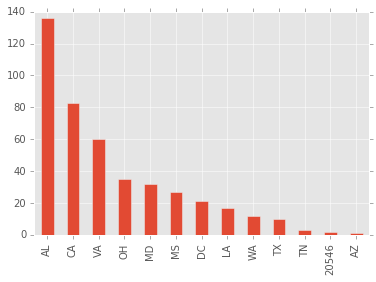

In [44]:
df['State'].value_counts().plot(kind='bar', x='State')

### Graph 2 NASA Lab Facilities Distribution by Agencies

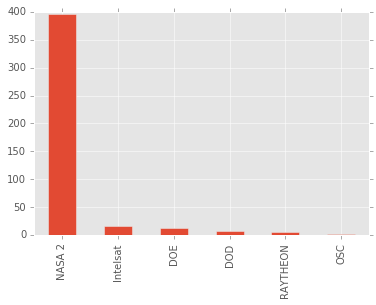

In [45]:
df['Agency'].value_counts().plot(kind='bar', x='Agency')

### Graph 3 NASA Lab Facilities Started Over the Last 60 Years

In [46]:
df_no = pd.read_excel("year-num-nasa.xlsx")

In [47]:
df_no

,Year,Number
0,1960-69,152
1,1970 – 79,21
2,1980 – 89,30
3,1990 – 99,33
4,2000 – 09,5
5,2010 – 1016,2


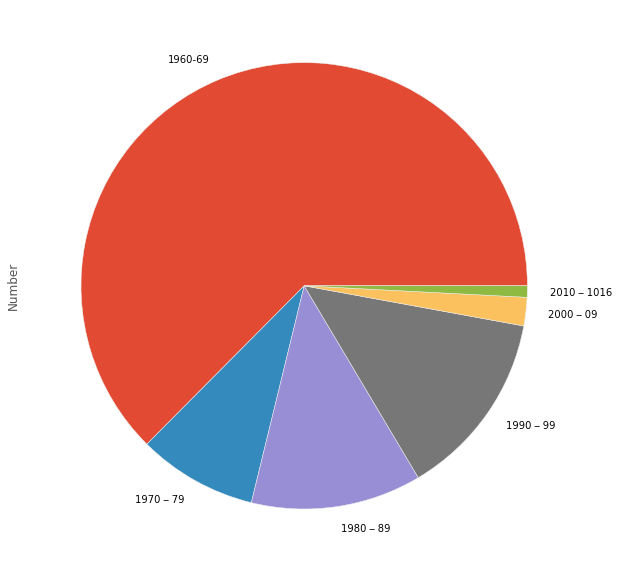

In [222]:
fig, ax = plt.subplots(figsize=(10,10))
df_no['Number'].plot(kind='pie', labels=df_no['Year'])
plt.savefig("occupied.pdf", transparent=True)